   <h1 align="center"> <font color='006899'>Introduction</font> <h1> 

<div class="alert alert-block alert-info">
    <b></b>
Bonjour Laurent.
Pour rappel je suis data analyst en freelance, j’interviens pour BottleNeck suite à un besoin : 

La demande de BottleNeck est le rapprochement de 2 bases manuels qui permettrait d’analyser les ventes sur le net en attendant une solution plus centralisée. 

Cette demande s’articule sur 3 points que nous allons aborder dans la suite de cette présentation : 
J’expliquerai le rapprochement de deux exports, un export d’une table ERP contenant les références des produits, leur prix de vente et leur état de stock, avec un export de table de l’outils de CMS contenants les informations des produits commercialisés en ligne (nom, description, nombre de ventes …).
Puis, j’exposerais le chiffre d’affaires par produit ainsi que le chiffre d’affaires total réalisé en ligne, sur le web. 
En dernier lieu, j’approfondirais sur la variable du prix de vente par produit afin de détecter ou non d’éventuelles erreurs de saisies ou de valeurs aberrantes. 

Je vais vous présenter mon notebook de travail suivant ces différents points. Tout au long de ma présentation je détaillerais mes actions entreprises (notamment en relevant certaines incohérences) pour obtenir un jeu de données final et cohérent.
        </div>

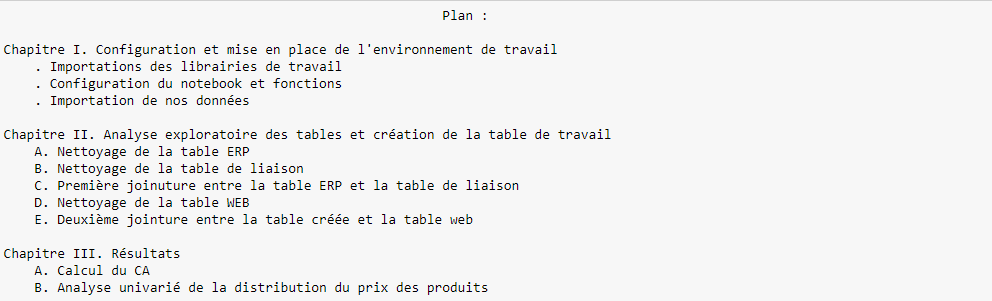

<h1 align="center"> <font color='006899'>I. Configuration et mise en place de l'environnement de travail</font>  <h1> 

<h4 align="center"> <font color='006899'>Importation des librairies de travail</font>  <h4> 

In [1]:
#Importation de la librairie Pandas et numpy
import pandas as pd
import numpy as np

#Importation de la librairie matplotlib et seaborn pour la visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

#Importation eviter les messages rouges d'erreurs
import warnings
warnings.filterwarnings("ignore")

<h4 align="center"> <font color='006899'> Configuration du notebook et fonctions </font> <h4> 

In [ ]:
# Configuration du display options afficher toutes les lignes
pd.set_option("display.max_rows", None)

<h4 align="center"> <font color='006899'> Importation de nos données </font> <h4> 

In [2]:
#Importation du fichier erp
erp = pd.read_excel('C:/Users/alex/Desktop/Projet OCR/Projet_5/données/erp.xlsx')

#Importation du fichier liaison
liaison = pd.read_excel('C:/Users/alex/Desktop/Projet OCR/Projet_5/données/liaison.xlsx')

#Importation du fichier web
web = pd.read_excel('C:/Users/alex/Desktop/Projet OCR/Projet_5/données/web.xlsx')

<h1 align="center"> <font color='006899'>II. Analyse exploratoire des tables et création de la table de travail</font>  <h1> 

<h2 align="center"> <font color='006899'>A. Netoyage de la table ERP</font>  <h2> 

In [3]:
# Consulte le nombre de colonnes et lignes

erp.shape

(825, 5)

In [4]:
# La nature des données dans chacune des colonnes

erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [5]:
# Vérification pas de valeurs abéranttes dans les min et max par exemple

erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.384000,26.583030
std,902.644635,0.337506,26.832271,45.875948
min,3847.000000,0.000000,-8.000000,-1.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [6]:
# Vérification qu'il n'y ait pas de valeurs nulles

erp.isna().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [7]:
# Vérification qu'il n'y ait pas de doublons 

erp.duplicated().sum()

0

In [8]:
# Affichage des 5 premières lignes de la table

erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [9]:
# Regarde le champs: onsale_web --> on comprends booleen si le pdt est vendu sur le web ou non

erp['onsale_web'].value_counts()

1    717
0    108
Name: onsale_web, dtype: int64

In [10]:
# Regarde le champs: price --> Ici on a le min qui est negatif, bizarre approfondissons

erp['price'].describe()

count    825.000000
mean      32.384000
std       26.832271
min       -8.000000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64

In [11]:
# Nous avons deux prix en negatifs, surement une erreur, gardons le dans un coin de la tête

erp.loc[erp['price'] < 0,:]

,product_id,onsale_web,price,stock_quantity,stock_status
469,5017,0,-8.0,0,outofstock
739,6594,0,-1.0,192,instock


In [12]:
# Regarde le champs: stock_quantity  --> bizarre nous avons le minimum du stock_quantité qui est négatif

erp['stock_quantity'].describe()

count    825.000000
mean      26.583030
std       45.875948
min       -1.000000
25%        1.000000
50%       11.000000
75%       34.000000
max      578.000000
Name: stock_quantity, dtype: float64

In [13]:
# On filtre pour savoir si il y a plusieurs quantité de stock negative. 
# --> 2 résultats, on regarde le champs d'a coté 'stock_status' pour comprendre, peut être un lien entre les deux?

erp.loc[erp['stock_quantity'] < 0,:]

,product_id,onsale_web,price,stock_quantity,stock_status
449,4973,0,10.0,-1,outofstock
573,5700,1,44.5,-1,outofstock


In [14]:
# Regarde le champs: stock_status --> les produits peuvent être en stock ou hors du stock
erp['stock_status'].value_counts()

instock       638
outofstock    187
Name: stock_status, dtype: int64

In [15]:
# Ici on regarde tous les statuts hors de stock qui ont des quantités de stock

erp.loc[(erp['stock_status'] == 'outofstock') & (erp['stock_quantity'] != 0),:]

,product_id,onsale_web,price,stock_quantity,stock_status
19,4055,0,86.1,1,outofstock
49,4090,0,73.0,6,outofstock
50,4092,0,47.0,6,outofstock
449,4973,0,10.0,-1,outofstock
573,5700,1,44.5,-1,outofstock
630,5826,1,41.2,12,outofstock
696,6125,0,14.2,48,outofstock


In [16]:
# On regarde l'inverse, ici on a un produit qui a un statut en stock alors qu'il n'a pas de quantité de stock. 
# hypothèse: base de donnée pas à jour ?

erp.loc[(erp['stock_status'] == 'instock') & (erp['stock_quantity'] <=0),:]

,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.0,0,instock


In [17]:
# Vérifie l'unicité de la clé ici product_id --> ici 825 valeurs unique pour 825 produits donc tous uniques.

erp['product_id'].nunique()

825

In [18]:
# Création d'une liste de tous les product_id, qui servira plus tard

List_erp_product_id = erp['product_id'].tolist()

<h2 align="center"> <font color='006899'>B. Netoyage de la table de liaison</font>  <h2>     

In [19]:
# Consulte le nombre de colonnes et lignes

liaison.shape

(825, 2)

In [20]:
# La nature des données dans chacune des colonnes--> ici on voit que id_web est pas un entier on va regarder en detail

liaison.dtypes

product_id     int64
id_web        object
dtype: object

In [21]:
# Vérification qu'il n'y ait pas de valeurs nulles --> 91 valeurs nulles pour id_web, on verra plus tard après la première jointure

liaison.isna().sum()

product_id     0
id_web        91
dtype: int64

In [22]:
# Vérification qu'il n'y ait pas de doublons 

liaison.duplicated().sum()

0

In [23]:
# Affichage des 5 premières lignes de la table

liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [24]:
# On commence par regarder le champs product_id
# Vérifie l'unicité de la clé --> ici 825 valeurs uniques comme pour la table erp, mais est-ce que ce sont les mêmes valeurs, 
# est ce que les valeurs correspondent? faisons une comparaison entre id product de erp et liaison

liaison['product_id'].nunique()

825

In [25]:
# Création d'une liste de tous les product_id pour la comparer à celle du DF erp

List_liaison_product_id = liaison['product_id'].tolist()

In [26]:
# Creation d'une fonction pour comparer si toutes les valeurs des deux listes sont identiques : renvoie true sinon false.
# --> Ici nous avons les 825 mêmes id entre les deux DF

def compare_list(list1, list2):
    return list1 == list2
print(compare_list(List_erp_product_id, List_liaison_product_id))

True


In [27]:
# On s'interesse au champs id_web : on va commencer par le renommer pour harmoniser les libellés. 

liaison = liaison.rename(columns={"id_web": "web_id"})

In [28]:
# On a pu voir que que web_id qui fera la liaison entre cete table et celle du web n'est pas un entier, regardons de plus près.
# Effectivement ici on voit qu'il y a des valeurs non numeriques avec des tirets par exemple, on va les laisser comme ca pour 
# l'instant, on garde cette info en tête.

liaison['web_id'].tail()

820        NaN
821        NaN
822    13127-1
823    14680-1
824      16230
Name: web_id, dtype: object

In [29]:
# Vérifie la taille de notre DF

liaison.shape

(825, 2)

<h2 align="center"> <font color='006899'>C. Première jointure entre la table ERP et la table de liaison</font>  <h2>        

In [30]:
erp['product_id'].nunique()

825

In [31]:
liaison['product_id'].nunique()

825

In [32]:
# Pour joindre ces deux tables en une seule (erp et liaison) la clé est donc product_id. 
# Ici pour erp pour avons 825 valeurs uniques qui sont les mêmes que ceux de la table liaison (verifié precedemment)

In [33]:
# jointure entre erp et liaison :

erp_liaison = pd.merge(erp, liaison, on=['product_id'], how='left', indicator=True)
erp_liaison.head()

,product_id,onsale_web,price,stock_quantity,stock_status,web_id,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both


In [34]:
erp_liaison['_merge'].value_counts()

both          825
left_only       0
right_only      0
Name: _merge, dtype: int64

In [35]:
# Supprime l'indicateur pour la prochaine jointure

erp_liaison.drop(columns=['_merge'], inplace=True)

In [36]:
erp_liaison.shape

(825, 6)

In [37]:
# On s'était posé la question par rapport à 2 produits qui ont un prix négatif, dans tous les cas on les ecartes de notre
# analyse car ils n'ont pas de correspondance avec les produits venduent sur le web ('web_id' + onsale_web=0)

erp_liaison.loc[erp_liaison['price']<0,:]

,product_id,onsale_web,price,stock_quantity,stock_status,web_id
469,5017,0,-8.0,0,outofstock,NaN
739,6594,0,-1.0,192,instock,NaN


In [38]:
# On a vu qu'il y avait des valeurs null pour le champs: 'web_id', on va donc les séparer car on ne peut pas les utiliserer.
# Ici on fait une sauvegarde de la partie qu'on utilise pas.

S_erp_liaison = erp_liaison[erp_liaison['web_id'].isna()]

In [39]:
# Une fois stocké on peut donc les enlever de la table avec lequel on va continuer de travailler

erp_liaison = erp_liaison.dropna(subset=['web_id'])

In [40]:
# Vérifie qu'on a supprimer nos 91 valeurs nulles de sku : 825-91 = 734 valeurs restantes.

erp_liaison.shape

(734, 6)

<h2 align="center"> <font color='006899'>D. Netoyage de la table WEB </font>  <h2>    

In [41]:
# Consulte le nombre de colonnes et lignes

web.shape

(1513, 28)

In [42]:
# La nature des données dans chacune des colonnes

web.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


In [43]:
# Vérification pas de valeurs abéranttes dans les min et max par exemple --> donne une idée générale

web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,3.855245,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,7.702346,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


In [44]:
# Regarde si il existe des valeurs nulles dans cette table --> ici beaucoup, on fera du cas par cas

web.isna().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [45]:
# Affichage les 5 premières lignes de la table

web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [46]:
# Vérifie l'unicité de la clé, ici sku qu'on renomme en web_id: 714 valeurs uniques pour 1513 lignes on approfondit notre recherche

web = web.rename(columns={"sku": "web_id"})
web['web_id'].nunique()

714

In [47]:
#Regarde si il y a des doublons --> ici 82 doublons d'une ligne vide avec juste 3 champs = 0

web[web.duplicated()]

# web.duplicated().sum()

,web_id,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
17,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1448,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1450,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# On voit que la ligne dont l'index est 17 contient que des Nan et 3 valeurs = 0, et on sait qu'elle est doublé 82 fois.
# Nan not a numeric / NaT not a time (date)

web.loc[17]

web_id                   NaN
virtual                    0
downloadable               0
rating_count               0
average_rating           NaN
total_sales              NaN
tax_status               NaN
tax_class                NaN
post_author              NaN
post_date                NaT
post_date_gmt            NaT
post_content             NaN
post_title               NaN
post_excerpt             NaN
post_status              NaN
comment_status           NaN
ping_status              NaN
post_password            NaN
post_name                NaN
post_modified            NaT
post_modified_gmt        NaT
post_content_filtered    NaN
post_parent              NaN
guid                     NaN
menu_order               NaN
post_type                NaN
post_mime_type           NaN
comment_count            NaN
Name: 17, dtype: object

In [49]:
# Ici on voit qu'il y a 2 lignes qui n'ont pas de clé 'web_id mais qui ont des valeurs 

web['web_id'].isna().sum()

85

In [50]:
# On les identifie / comme ils ont des valeurs j'ai pris un champs au hasard ici post_date et filtré dessus

web.loc[web['post_date'].notnull() & web['web_id'].isna(),:]

,web_id,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
353,NaN,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
488,NaN,0,0,0,0.0,10.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [51]:
# Je vais donc stocker à part les 85 lignes qui n'ont pas de clé 'web_id'. (83 doublons + 2 lignes sans clé)

S_web= web[web['web_id'].isna()]

In [52]:
# Une fois stocké on peut donc les enlever de la table avec lequel on va continuer de travailler 

web = web.dropna(subset=['web_id'])

In [53]:
# on regarde le nombre de ligne après ce nettoyage

web.shape

(1428, 28)

In [54]:
# Ici on voit qu'il y a 714 doublons sur web_id, qu'ils ont été doublé

len(web['web_id'])-len(web['web_id'].drop_duplicates())

714

In [55]:
# On peut vérifier avec un web_id --> celui ci est bien doublé

web.loc[web['web_id'] == 15075,:]

,web_id,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1432,15075,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [56]:
# On regarde que c'est le cas pour tous  (13 colonnes car pas de sum sur des Nan bcp de colonnes sans valeurs)

web.groupby(by = ['web_id']).sum()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
web_id,,,,,,,,,,,,,
38,0,0,0,0.0,76.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
41,0,0,0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
304,0,0,0,0.0,80.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
523,0,0,0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
531,0,0,0,0.0,26.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19820,0,0,0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
19821,0,0,0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
19822,0,0,0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# On sauvegarde toute l'autre partie qu'on utilisera pas dans le même df de sauvegarde S_web

S_web_TMP = web.loc[web['post_type'] == 'attachment',:]

S_web = pd.concat([S_web,S_web_TMP])

In [58]:
# On voit qu'il y a plusieurs differences entre ces deux lignes qui ont le même ID 'web_id'.
# On essaie de comprendre laquel on peut garder pour appliquer une règle sur toute la table
# Ici on part du principe que le 'post_type' de la donnée principale est 'product'.

web = web.loc[web['post_type'] == 'product',:]

In [59]:
# Retest l'unicité de la clé : 714 id unique pour 714 lignes

web['web_id'].nunique()

714

In [60]:
# On vérifie la forme de la table

web.shape

(714, 28)

In [61]:
# On essaie de comprendre nos champs de cette table 
# j'ai décidé de les laisser mêmes si ils sont vides

In [62]:
# Champs : virtual --> que des valeurs egale à 0

web['virtual'].value_counts()

0    714
Name: virtual, dtype: int64

In [63]:
# Champs : downloadable --> que des valeurs egale à 0

web['downloadable'].value_counts()

0    714
Name: downloadable, dtype: int64

In [64]:
# Champs : rating_count --> que des valeurs egale à 0

web['rating_count'].value_counts()

0    714
Name: rating_count, dtype: int64

In [65]:
# Champs : average_rating --> que des valeurs egale à 0

web['average_rating'].value_counts()

0.0    714
Name: average_rating, dtype: int64

In [66]:
# Champs : total_sales --> correspond au total des ventes d'un produit

web['total_sales'].value_counts()

0.0     329
1.0      87
3.0      52
2.0      40
4.0      30
6.0      25
5.0      22
7.0      19
12.0     15
9.0      10
10.0     10
8.0      10
18.0      7
11.0      7
13.0      6
19.0      5
14.0      4
15.0      4
38.0      2
22.0      2
20.0      2
17.0      2
30.0      2
36.0      2
24.0      2
23.0      2
16.0      2
32.0      1
29.0      1
41.0      1
33.0      1
62.0      1
21.0      1
40.0      1
96.0      1
42.0      1
46.0      1
26.0      1
37.0      1
43.0      1
87.0      1
Name: total_sales, dtype: int64

In [67]:
# Champs : tax_status --> information pour savoir si le produit est taxé ou non, ici tous les produits sont taxés

web['tax_status'].value_counts()

taxable    714
Name: tax_status, dtype: int64

In [68]:
# Champs : tax_class --> que des valeurs nulles, surement pour indiquer un tx de taxage, peut être utile dans le futur

web['tax_class'].value_counts()

Series([], Name: tax_class, dtype: int64)

In [69]:
# Champs : post_author --> 2 variation de valeur 1 ou 2 

web['post_author'].value_counts()

2.0    713
1.0      1
Name: post_author, dtype: int64

In [70]:
# Champs : post_date / post_date_gmt / post_modified / post_modified_gmt --> dates de création et de modification

web['post_date'].value_counts().sum()
web['post_date_gmt'].value_counts().sum()
web['post_modified'].value_counts().sum()
web['post_modified_gmt'].value_counts().sum()

714

In [71]:
# Champs : post_content --> que des valeurs nulles, peut être utile dans le futur

web['post_content'].value_counts()

Series([], Name: post_content, dtype: int64)

In [72]:
# Champs : post_title --> Indique le titre du post du produit sur le web

web['post_title'].value_counts().sum()

714

In [73]:
# Champs : post_excerpt --> descriptif du produit sur le web

web['post_excerpt'].value_counts().sum()

714

In [74]:
# Champs : post_status--> status de l'annonce web? tous publiés

web['post_status'].value_counts()

publish    714
Name: post_status, dtype: int64

In [75]:
# Champs : comment_status --> status des commentaires web? tous fermés

web['comment_status'].value_counts()

closed    714
Name: comment_status, dtype: int64

In [76]:
# Champs : ping_status--> statut de la connexion? tous fermés

web['ping_status'].value_counts()

closed    714
Name: ping_status, dtype: int64

In [77]:
# Champs : post_password --> que des valeurs nulles, peut être utile dans le futur

web['post_password'].value_counts()

Series([], Name: post_password, dtype: int64)

In [78]:
# Champs : post_name --> Indique le nom et millésime du produit / similaire au champs post_title

web['post_name'].value_counts().sum()

714

In [79]:
# Champs : post_content_filtered --> que des valeurs nulles, peut être utile dans le futur

web['post_content_filtered'].value_counts()

Series([], Name: post_content_filtered, dtype: int64)

In [80]:
# Champs : post_parent --> que des valeurs egale à 0

web['post_parent'].value_counts()

0.0    714
Name: post_parent, dtype: int64

In [81]:
# Champs : guid --> correspond au lien internet des produits

web['guid'].value_counts().sum()

714

In [82]:
# Champs : menu_order --> que des valeurs egale à 0

web['menu_order'].value_counts()

0.0    714
Name: menu_order, dtype: int64

In [83]:
# Champs : post_type --> Comme on a pu le voir le plus tôt, peut etre product ou attachement, pèce jointe ou produit.

web['post_type'].value_counts()

product    714
Name: post_type, dtype: int64

In [84]:
# Champs : post_mime_type --> que des valeurs nulles, peut être utile dans le futur

web['post_mime_type'].value_counts()

Series([], Name: post_mime_type, dtype: int64)

In [85]:
# Champs : comment_count --> que des valeurs egale à 0

web['comment_count'].value_counts()

0.0    714
Name: comment_count, dtype: int64

<h2 align="center"> <font color='006899'>E. Deuxième jointure entre la table créée et la table web</font>  <h2>        

In [86]:
# Avant de joindre les 2 tables on compare les id 'web_id' de la table erp_liaison et de la table web

# Création d'une liste de tous les id web de la table erp_liaison 
List_erp_liaison_web_id = erp_liaison['web_id'].tolist()

# Création d'une liste de tous les id web de la table web
List_web_web_id= web['web_id'].tolist()

In [87]:
# On applique la même methode qu'on a vu plus tôt mais ici ca me retourne false, normal car 
# nous avons pas le même nombre d'id unique : 734 pour erp_liaison et 714 pour web. On va faire autrement

print(compare_list(List_erp_liaison_web_id , List_web_web_id))

False


In [88]:
# les valeurs qui ne correspondent pas entre les deux listes ont les stock dans une nouvelle liste

List_PasCorrespondance = [x for x in List_erp_liaison_web_id + List_web_web_id if x not in List_erp_liaison_web_id or x not in List_web_web_id]

In [123]:
List_PasCorrespondance

[13771,
 15065,
 14785,
 12601,
 15154,
 14360,
 15608,
 15586,
 15272,
 15630,
 14648,
 14715,
 14730,
 14689,
 14379,
 15609,
 14377,
 13577,
 15529,
 '14680-1']

In [89]:
# On travail avec cette liste pour comprendre à quoi correspondent ces lignes
# Ici on voit que 20 produits font partis de cette liste, il ne sont pas vendus sur internet (onsale web 0) donc surement 
# pas d'id web sur df web

erp_liaison.loc[erp_liaison['web_id'].isin(List_PasCorrespondance), :]

,product_id,onsale_web,price,stock_quantity,stock_status,web_id
193,4289,0,22.8,0,outofstock,13771
236,4568,0,21.5,0,outofstock,15065
241,4584,0,32.3,0,outofstock,14785
355,4741,0,12.4,0,outofstock,12601
391,4864,0,8.3,0,outofstock,15154
394,4869,0,17.2,0,outofstock,14360
424,4921,0,13.8,0,outofstock,15608
425,4922,0,21.5,0,outofstock,15586
470,5018,0,15.4,0,outofstock,15272
473,5021,0,17.1,0,outofstock,15630


In [90]:
# On vérifie cela, et oui aucun produit de cette liste n'est présent dans la table web

web.loc[web['web_id'].isin(List_PasCorrespondance), :]

,web_id,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [91]:
# On va donc stocker ces 20 produits de la table erp_liaison qui n'auront pas de correspondance sur la table web dans
# la table de sauvegarde

S_erp_liaison_TMP = erp_liaison.loc[erp_liaison['web_id'].isin(List_PasCorrespondance), :]

S_erp_liaison = pd.concat([S_erp_liaison,S_erp_liaison_TMP])

In [92]:
# Maintenant qu'ils sont stocker on va les enelver de la table erp_liaison
# Donc resumons: nous avons 714 web_id identique entre la table erp_liaison et web

erp_liaison = erp_liaison[~erp_liaison['web_id'].isin(List_PasCorrespondance)]
erp_liaison.shape

(714, 6)

In [93]:
web['web_id'].nunique()

714

In [94]:
erp_liaison['web_id'].nunique()

714

In [95]:
# Jointure entre erp_liaison et web

erp_web = pd.merge(erp_liaison, web, on=['web_id'], how='inner', indicator=True)

In [96]:
erp_web.shape

(714, 34)

In [97]:
#Vérifier notre jointure 

erp_web['_merge'].value_counts()

both          714
left_only       0
right_only      0
Name: _merge, dtype: int64

In [98]:
erp_web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,web_id,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,0,0,0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,0,0,0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [99]:
# Verification pas de doublons de web id : 
#v1
erp_web['web_id'].nunique()
#v2
len(erp_web['web_id'])-len(erp_web['web_id'].drop_duplicates())

0

<h1 align="center"> <font color='006899'>III. Résultats</font>  <h1>  

<h2 align="center"> <font color='006899'>A. Calcul du CA</font>  <h2>     

In [100]:
# CA par produit : on ajoute une colonne du CA par produit

erp_web['ca_product'] = erp_web['price']*erp_web['total_sales']
erp_web[['product_id','ca_product']].head()

,product_id,ca_product
0,3847,145.2
1,3849,0.0
2,3850,0.0
3,4032,42.3
4,4039,0.0


In [101]:
# On calcul le CA total de BottleNeck

CA_Total = erp_web['ca_product'].sum()
print("Le chiffre d'affaires total de BottleNeck est de",CA_Total, "€" )

Le chiffre d'affaires total de BottleNeck est de 70568.6 €


<h2 align="center"> <font color='006899'>B. Analyse univarié de la distribution du prix des produits</font>  <h2>     

In [102]:
# On vérifie que la variable prix est du même type

erp_web['price'].dtypes

dtype('float64')

In [103]:
# On vérifie bien qu'il n'y a pas de valeurs nulles dedans

erp_web['price'].isna().sum()

0

In [104]:
# Calcul la moyenne : 

xbar = erp_web['price'].mean()
round(xbar,2)

32.49

In [105]:
# Calcul la mediane : 

M = erp_web['price'].median()
round(M,2)

23.55

In [106]:
# Calcul ecart type : --> ecart type grand donc distribution (valeurs) dispersées

sprime = erp_web['price'].std(ddof=1)
round(sprime,2)

27.81

In [107]:
# Calcul variance : --> grosse variance idem

sprime2 = erp_web['price'].var(ddof=1)
round(sprime2,2)

773.43

In [108]:
# Mesure de dispersion: Si la Skewness est supérieur à 0, alors le dataset est dispersé (biais) sur la droite. 
# C'est à dire que la majorité des données se trouvent sur la gauche et les outliers se trouvent sur la droite

from scipy.stats import skew
erp_web['price'].skew()

2.58090126300337

<h3 align="center"> <font color='006899'>1ière technique : L'ecart interquartile</font>  <h3>  

<AxesSubplot:title={'center':'boxplot'}, xlabel='price'>

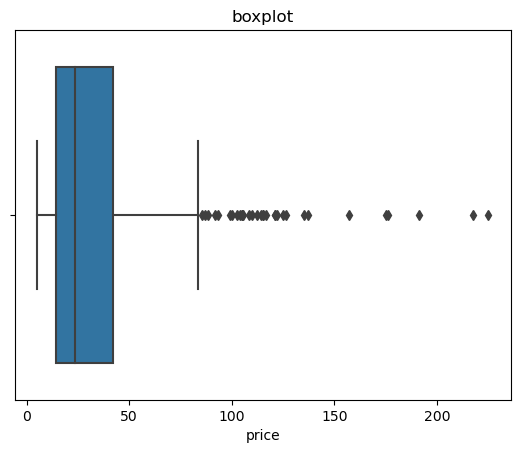

In [110]:
# Ici nous allons exposé sa distribution dans une boite à moustache pour mieux la comprendre

plt.title("boxplot")
sns.boxplot(data=erp_web, x=erp_web['price'])

In [112]:
# Fonction interquatile pour voir les valeurs en dehors de IQR

def find_outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return outliers

In [113]:
# Créer une liste des valeurs outliers qu'on a pu détecter

List_outliers_IQR = find_outliers_IQR(erp_web['price'])
print("nombre d'outliers: "+ str(len(List_outliers_IQR)))

nombre d'outliers: 32


In [114]:
# Créer une table avec uniquement les outliers qu'on a pu identifier

df_outliers_IQR = erp_web[erp_web['price'].isin(List_outliers_IQR)][['product_id','post_name','price']]
df_outliers_IQR.sort_values(by = 'price', ascending=False).head(10)

,product_id,post_name,price
199,4352,champagne-egly-ouriet-grand-cru-millesime-2008,225.0
426,5001,david-duband-charmes-chambertin-grand-cru-2014,217.5
587,5892,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,191.3
218,4402,cognac-frapin-vip-xo,176.0
553,5767,camille-giroud-clos-de-vougeot-2016,175.0
221,4406,cognac-frapin-chateau-de-fontpinot-1989-20-ans,157.0
381,4904,domaine-des-croix-corton-charlemagne-grand-cru...,137.0
642,6126,champagne-gosset-celebris-vintage-2007,135.0
201,4355,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,126.5
511,5612,domaine-weinbach-gewurztraminer-gc-furstentum-...,124.8


In [115]:
# Dernier outliers : 85,6 euros

df_outliers_IQR.sort_values(by = 'price', ascending=True).head(1)

,product_id,post_name,price
205,4359,champagne-larmandier-bernier-grand-cru-vieille...,85.6


In [116]:
# Créer un flag pour savoir si c'est un outliers ou non

erp_web['outliers'] = np.where(erp_web['price'].isin(List_outliers_IQR), 1, 0)

Text(0.5, 1.0, 'nuage de points')

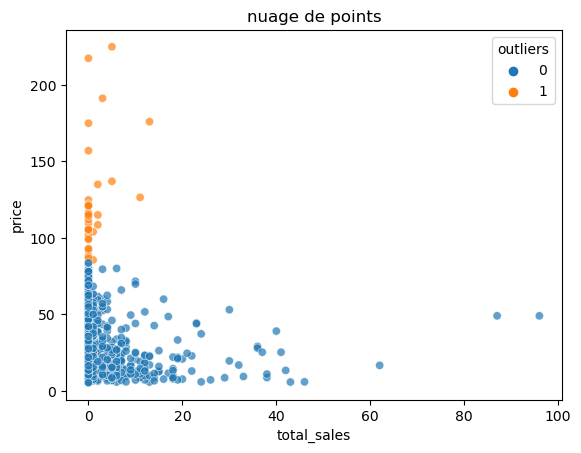

In [117]:
# Affiche les outliers

sns.scatterplot(data=erp_web, x='total_sales', y='price', hue=erp_web['outliers'], alpha=0.7)
plt.title("nuage de points")

<h3 align="center"> <font color='006899'>2ième technique : Le Z score</font>  <h3>  

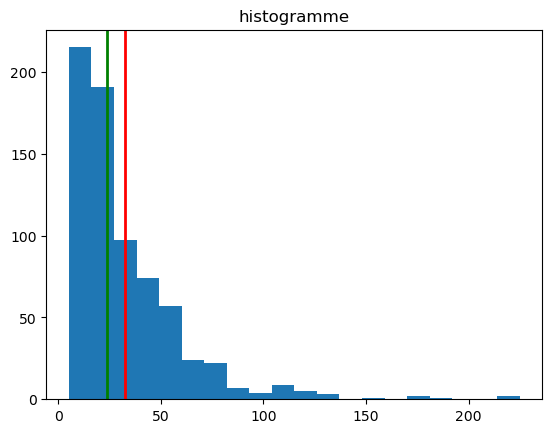

In [119]:
# Ici distribution décroissante exponentielle --> asymétrie positive

plt.hist(erp_web['price'],bins=20)
plt.title("histogramme")
plt.axvline(xbar, color='r', linewidth=2)
plt.axvline(M, color='g', linewidth=2)

In [120]:
threshold = 2
List_outliers_Z = []
for i in erp_web['price']:
    z = (i-xbar)/sprime
    if z > threshold:
        List_outliers_Z.append(i)
print("nombre d'outliers: "+ str(len(List_outliers_Z)))

nombre d'outliers: 30


In [121]:
# Créer une table avec uniquement les outliers qu'on a pu identifier

df_outliers_Z = erp_web[erp_web['price'].isin(List_outliers_Z)][['product_id','post_name','price']]
df_outliers_Z.sort_values(by = 'price', ascending=False).head(10)

,product_id,post_name,price
199,4352,champagne-egly-ouriet-grand-cru-millesime-2008,225.0
426,5001,david-duband-charmes-chambertin-grand-cru-2014,217.5
587,5892,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,191.3
218,4402,cognac-frapin-vip-xo,176.0
553,5767,camille-giroud-clos-de-vougeot-2016,175.0
221,4406,cognac-frapin-chateau-de-fontpinot-1989-20-ans,157.0
381,4904,domaine-des-croix-corton-charlemagne-grand-cru...,137.0
642,6126,champagne-gosset-celebris-vintage-2007,135.0
201,4355,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,126.5
511,5612,domaine-weinbach-gewurztraminer-gc-furstentum-...,124.8


In [122]:
# Dernièr outliers : 88,4 euros

df_outliers_Z.sort_values(by = 'price', ascending=True).head(1)

,product_id,post_name,price
65,4132,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,88.4
